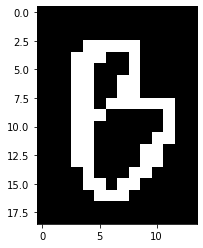

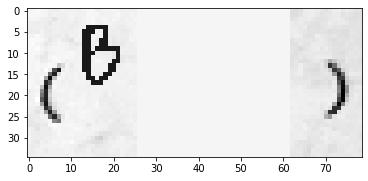

In [13]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

'''
方式一、直接填充
'''

data_root = 'D:\\PROJECT_TW\\git\\data\\ocr'
char_img_file = os.path.sep.join([data_root,'dest','SampleB','B_1103.png'])
bg_img_file = os.path.sep.join([data_root,'dest','bg','bg_A_1169.png'])




image = cv2.imread(char_img_file, cv2.IMREAD_GRAYSCALE)
bg_img = cv2.imread(bg_img_file, cv2.IMREAD_GRAYSCALE)
scale = 0.6
image = cv2.resize(image, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)

plt.imshow(image,'gray')
plt.show()

# print(image)
y, x = np.where(image != 0)
y += 1
x += 10
pos = np.array(zip(y,x))

bg_img[y,x] = 128
plt.imshow(bg_img,'gray')

cv2.imwrite('D://PROJECT_TW/git/data/tmp/tmp.png',bg_img)

plt.show()

uint8
(39, 77, 3)
(25, 28, 3)
(39, 77, 3)
(38, 19)


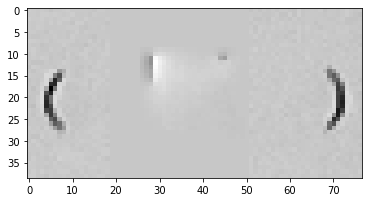

In [27]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

'''
方式二、采用图片融和的方式
'''

data_root = 'D:\\PROJECT_TW\\git\\data\\ocr'
char_img_file = os.path.sep.join([data_root,'images','SampleA','A_1003.png'])
char_img_pos = [45,17,80,48]
x1,y1,x2,y2 = char_img_pos
bg_img_file = os.path.sep.join([data_root,'dest','bg','bg_A_1029.png'])
image = cv2.imread(char_img_file, cv2.IMREAD_COLOR)
bg_img = cv2.imread(bg_img_file, cv2.IMREAD_COLOR)
image = image[y1:y2,  x1:x2, ]
scale = 0.8
image = cv2.resize(image, (0,0), fx=scale, fy=scale, interpolation = cv2.INTER_AREA)
# bg_img = cv2.resize(bg_img, (0,0), fx=2.0, fy=2.0, interpolation = cv2.INTER_AREA)
print(image.dtype)
mask = np.ones(image.shape, image.dtype) * 255
print(bg_img.shape)
print(image.shape)

height,width,_ = bg_img.shape
print(bg_img.shape)
center = (int(width/2), int(height/2))
# center = (40, 18)
# center = (1,1)
print(center)
cv2.MIXED_CLONE
outimg = cv2.seamlessClone(image,bg_img, mask,center, cv2.NORMAL_CLONE)
outimg = cv2.cvtColor(outimg, cv2.COLOR_BGR2GRAY)
plt.imshow(outimg,'gray')
plt.show()